In [1]:
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import tensorflow as tf
import keras
import socket
import sqlite3
import time
import shutil
import numpy as np
from PIL import Image

2025-03-14 22:10:12.316565: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 22:10:13.049095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-14 22:10:13.452067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-14 22:10:13.562070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 22:10:14.073894: I tensorflow/core/platform/cpu_feature_guar

In [23]:
import os
import numpy as np
#import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time
from tensorflow.keras.optimizers import Adamax
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from math import log
from PIL import Image
import seaborn as sns


In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Only use the first GPU
    tf.config.set_visible_devices(gpus[0], 'GPU')


In [5]:
tf.config.list_physical_devices('GPU')
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4823411860121331322
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5833228288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15704184441209808352
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1741983045.087653  105607 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741983045.088480  105607 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741983045.088534  105607 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741983045.441087  105607 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741983045.441360  105607 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-14

In [7]:
root='~/repos/itfest2025'
print()
img_path="archive/Training"
datagen=ImageDataGenerator(rescale=1./255)
generator=datagen.flow_from_directory(directory=img_path,target_size=(128,128),batch_size=10000,class_mode='categorical')
imgs,labels=next(generator)


Found 5712 images belonging to 4 classes.


In [8]:
img_path="archive/Testing"
datatester=datagen.flow_from_directory(directory=img_path,target_size=(128,128),batch_size=10000,class_mode='categorical')

Found 1311 images belonging to 4 classes.


In [9]:
imgstesting,labelstesting=next(datatester)

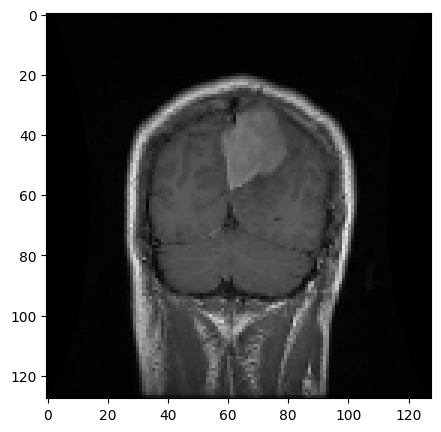

In [10]:
img_to_show=imgstesting[10]
label=labelstesting[10]
plt.figure(figsize=(10,5))
plt.imshow(img_to_show)
plt.show()

In [11]:
classes=generator.class_indices.keys()
num_classes=len(classes)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(imgs,labels,test_size=0.1,random_state=42)

In [13]:
model0=Sequential()
model0.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation="relu",
    padding="Same",
    input_shape=(128,128,3)
))
model0.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    padding="Same",
    activation="relu"
))
model0.add(MaxPool2D(
    pool_size=(2,2)
))
model0.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    activation="relu"
))
model0.add(MaxPool2D(
    pool_size=(2,2)
))
model0.add(Dropout(0.25))
model0.add(Flatten())
model0.add(Dense(
    128,
    activation="relu"
))
model0.add(Dropout(0.5))
model0.add(Dense(
    64,
    activation="relu"
))
model0.add(Dense(
    num_classes,
    activation="softmax"
))

/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741978696.031397   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.031856   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.031909   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.032796   90878 c

In [14]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,968,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,991,540 (7.60 MB)

 Trainable params: 1,991,540 (7.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08)
model0.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
datagen=ImageDataGenerator(
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

In [14]:
datagen.fit(x_train)

In [18]:
history=model0.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=15,
    verbose=1,
    # class_weight=class_weights
)

Epoch 1/15


I0000 00:00:1741978711.679395   91316 service.cc:146] XLA service 0x7cd2f8009d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741978711.679955   91316 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-14 20:58:31.810454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-14 20:58:32.109894: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  9/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2177 - loss: 1.8411

I0000 00:00:1741978716.739640   91316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.5307 - loss: 1.0947 - val_accuracy: 0.8217 - val_loss: 0.5174
Epoch 2/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7838 - loss: 0.5460 - val_accuracy: 0.8531 - val_loss: 0.3843
Epoch 3/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8483 - loss: 0.3943 - val_accuracy: 0.8409 - val_loss: 0.4067
Epoch 4/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.3211 - val_accuracy: 0.9143 - val_loss: 0.2662
Epoch 5/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9181 - loss: 0.2417 - val_accuracy: 0.9283 - val_loss: 0.2286
Epoch 6/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9379 - loss: 0.1874 - val_accuracy: 0.9458 - val_loss: 0.1846
Epoch 7/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9459 - loss: 0.1506 - val_accuracy: 0.9336 - val_loss: 0.2149
Epoch 8/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9525 - loss: 0.1468 - val_accuracy: 0.937

In [19]:
preds=model0.predict(imgstesting)
pred_class=np.argmax(preds,axis=1)
y_true=np.argmax(labelstesting,axis=1)
mat=confusion_matrix(y_true,pred_class)
mat2=np.zeros((num_classes,num_classes),)
for i in range(num_classes):
    sm=sum(mat[i])
    for j in range(num_classes):
        x=mat[i][j]/sm
        mat2[i][j]=x

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [20]:
mat2_arr=np.array(mat2)
labels=classes

In [21]:
conf_mat_test=pd.DataFrame(data=mat2_arr,columns=labels,index=labels)

<Axes: >

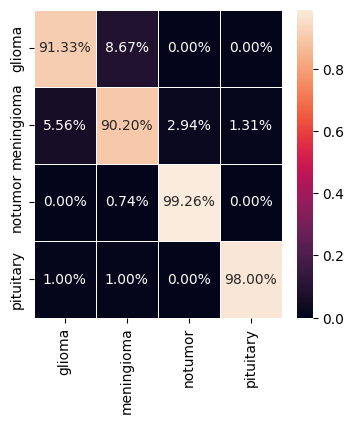

In [22]:
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")

In [23]:
model0.save('brain_tumor_version1.keras')

In [ ]:
# img_shape=(128,128,3)
# tf.keras.layers,
model1=Sequential()
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(num_classes,activation='softmax'))

/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model1.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_185 (Conv2D)             │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_186 (Conv2D)             │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_187 (Conv2D)             │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_188 (Conv2D)             │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_189 (Conv2D)             │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_190 (Conv2D)             │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_191 (Conv2D)             │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_192 (Conv2D)             │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_193 (Conv2D)             │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_194 (Conv2D)             │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_195 (Conv2D)             │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_196 (Conv2D)             │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_197 (Conv2D)             │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_198 (Conv2D)             │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,597,198 (193.01 MB)

 Trainable params: 16,865,732 (64.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,731,466 (128.68 MB)

In [41]:
datagen=ImageDataGenerator(
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

In [42]:
datagen.fit(x_train)

In [44]:
history=model1.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=15,
    verbose=1,
    # class_weight=class_weights
)

Epoch 1/15


I0000 00:00:1741984650.664021  106076 service.cc:146] XLA service 0x76ca18003c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741984650.665036  106076 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-14 22:37:30.828047: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-14 22:37:31.315927: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-14 22:37:32.292500: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1698', 8 bytes spill stores, 8 bytes spill loads

2025-03-14 22:37:32.428282: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory 

160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2598 - loss: 1.3867

2025-03-14 22:38:02.737378: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1698', 8 bytes spill stores, 8 bytes spill loads

2025-03-14 22:38:03.033920: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1698', 32 bytes spill stores, 32 bytes spill loads



161/161 ━━━━━━━━━━━━━━━━━━━━ 57s 249ms/step - accuracy: 0.2599 - loss: 1.3867 - val_accuracy: 0.2762 - val_loss: 1.3848
Epoch 2/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.2776 - loss: 1.3570 - val_accuracy: 0.2762 - val_loss: 1.3851
Epoch 3/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.3033 - loss: 1.3227 - val_accuracy: 0.3899 - val_loss: 1.1894
Epoch 4/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.5035 - loss: 1.0259 - val_accuracy: 0.6923 - val_loss: 0.7732
Epoch 5/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.7176 - loss: 0.6946 - val_accuracy: 0.7920 - val_loss: 0.5093
Epoch 6/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.8065 - loss: 0.4857 - val_accuracy: 0.8182 - val_loss: 0.4947
Epoch 7/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.8489 - loss: 0.3989 - val_accuracy: 0.8479 - val_loss: 0.4319
Epoch 8/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8578 - loss: 0.3599 - val

In [46]:
preds=model1.predict(imgstesting)
pred_class=np.argmax(preds,axis=1)
y_true=np.argmax(labelstesting,axis=1)
mat=confusion_matrix(y_true,pred_class)
mat2=np.zeros((num_classes,num_classes),)
for i in range(num_classes):
    sm=sum(mat[i])
    for j in range(num_classes):
        x=mat[i][j]/sm
        mat2[i][j]=x

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


In [47]:
mat2_arr=np.array(mat2)
labels=classes

In [48]:
conf_mat_test=pd.DataFrame(data=mat2_arr,columns=labels,index=labels)

<Axes: >

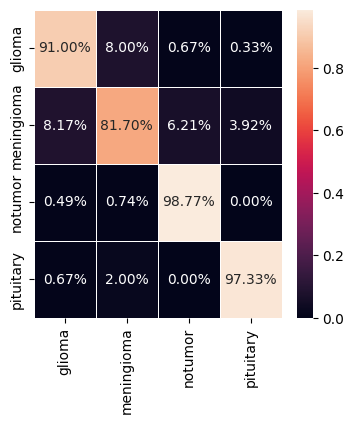

In [49]:
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")

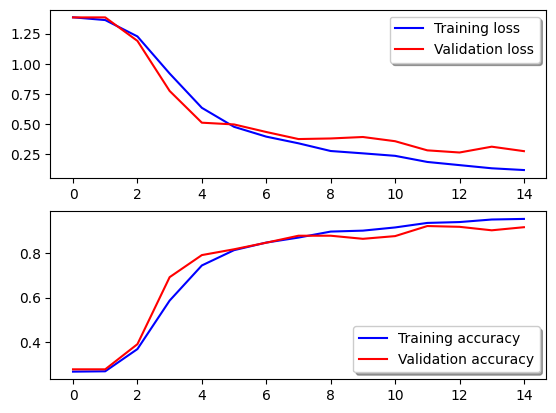

In [51]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)